# Validation of Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

import networkx as nx
import dowhy
import pandas as pd
from dowhy import CausalModel

style.use('fivethirtyeight') # bmh

import math
import dowhy.datasets, dowhy.plotter

import hyppo
import pingouin as pg
import conditional_independence

from hyppo.independence import Hsic

# the code below simple hides some warnings we don't want to see
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)


# a utility function to parse the .gml file to string
def gml_to_string(file):
    gml_str = ''
    with open(file, 'r') as file:
        for line in file:
            gml_str += line.rstrip()
    return gml_str

path = "/Users/dj/Documents/GitHub/Causal_Data_Science/Project/Data/lucas0_text/"
names = ['Smoking', 'Yellow_Fingers', 'Anxiety', 'Peer_Pressure', 'Genetics', 'Attention_Disorder','Born_an_Even_Day', 'Car_Accident', 'Fatigue', 'Allergy', 'Coughing']


# reading csv files
train =  pd.read_csv(path + 'lucas0_train.data', sep=" ", header = None)
train.drop(11, inplace = True, axis = 1)
train.columns = names
test =  pd.read_csv(path + 'lucas0_test.data', sep=" ", header = None)
test.drop(11, inplace = True, axis = 1)
test.columns = names
target =  pd.read_csv(path + 'lucas0_train.targets', sep=" ", header = None)
# param =  pd.read_csv(path + 'lucas0.param', sep=" ")

target[target[0] == -1] = 0

avgs = train[names].mean()

train["Lung_Cancer"] = np.array(target)

avgs = train.mean()


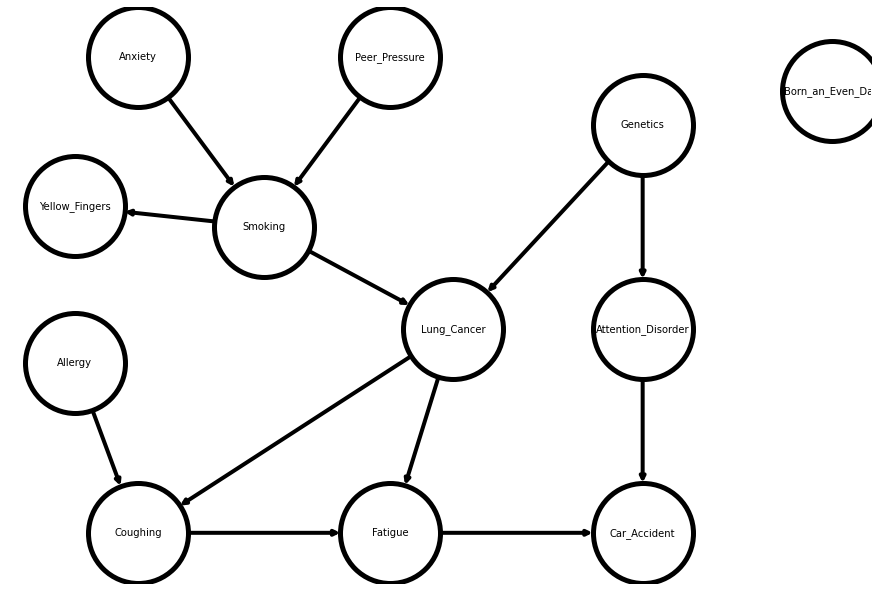

In [2]:
# we import networkx and create a directed graph
G = nx.DiGraph()

plt.figure(3,figsize=(12,8))

G.add_nodes_from(['Smoking', 'Yellow_Fingers', 'Anxiety', 'Peer_Pressure', 'Genetics', 'Attention_Disorder','Born_an_Even_Day', 'Car_Accident', 'Fatigue', 'Allergy', 'Coughing', 'Lung_Cancer'])

G.add_edges_from([('Anxiety','Smoking'), ('Peer_Pressure','Smoking'), ('Smoking','Yellow_Fingers'), ('Smoking','Lung_Cancer'), 
                  ('Allergy','Coughing'), ('Lung_Cancer','Coughing'), ('Coughing','Fatigue'), ('Lung_Cancer','Fatigue'),
                 ('Genetics','Lung_Cancer'), ('Genetics','Attention_Disorder'), ('Attention_Disorder', 'Car_Accident'), ('Fatigue', 'Car_Accident')])

# we can visualise this graph (choosing node positions, colours, and sizes to make it more clear) 
# and save it to a .gml format (for using DoWhy later)
pos = {'Anxiety': (-20, 40),              'Yellow_Fingers': (-25, 18),
         'Peer_Pressure': (0, 40), 'Smoking': (-10, 15), 'Allergy': (-25, -5),
         'Coughing': (-20, -30), 'Lung_Cancer': (5, 0), 'Genetics': (20, 30), 'Attention_Disorder': (20, 0),
         'Fatigue': (0, -30),'Car_Accident': (20, -30), 'Born_an_Even_Day' : (35,35)}

nx.draw(G, pos = pos,with_labels=True, node_size=10000, node_color='w', edgecolors ='black', linewidths= 5, width = 4, font_size = 10)
nx.write_gml(G, "backdoor_criterion_graph.gml")

plt.show()

In [85]:
def sigmoid(x, coefs, inter):
  if len(coefs) == 1:
    t = coefs[0] * x 
  else:
    t = coefs[0] + (x * coefs[1])
  return 1 / (1 + math.exp(-(inter + t)))

def p(x, coefs, inter):
  if len(coefs) == 1:
    t = coefs[0] * x
  else:
    t = coefs[0] + (x * coefs[1])
  return math.exp((inter + t)) / (1 + math.exp((inter + t)))

def x_vals(x, coefs, inter):
  if len(coefs) == 1:
    t = coefs[0] * x
  else:
    t = coefs[0] + (x * coefs[1])
  return math.exp((inter + t)) / (1 + math.exp((inter + t)))

In [82]:
x = np.arange(-20, 20,1)
coefs = [0.93930241]
coefs1 = [0.77547529, 0.37288989]

inter = 0.34006295
inter1 =  0.19306796

In [83]:
vals = []
for i in x:
    r = sigmoid(i, coefs, inter)
    vals.append(r)

vals1 = []
for i in x:
    r = sigmoid(i, coefs1, inter1)
    vals1.append(r)

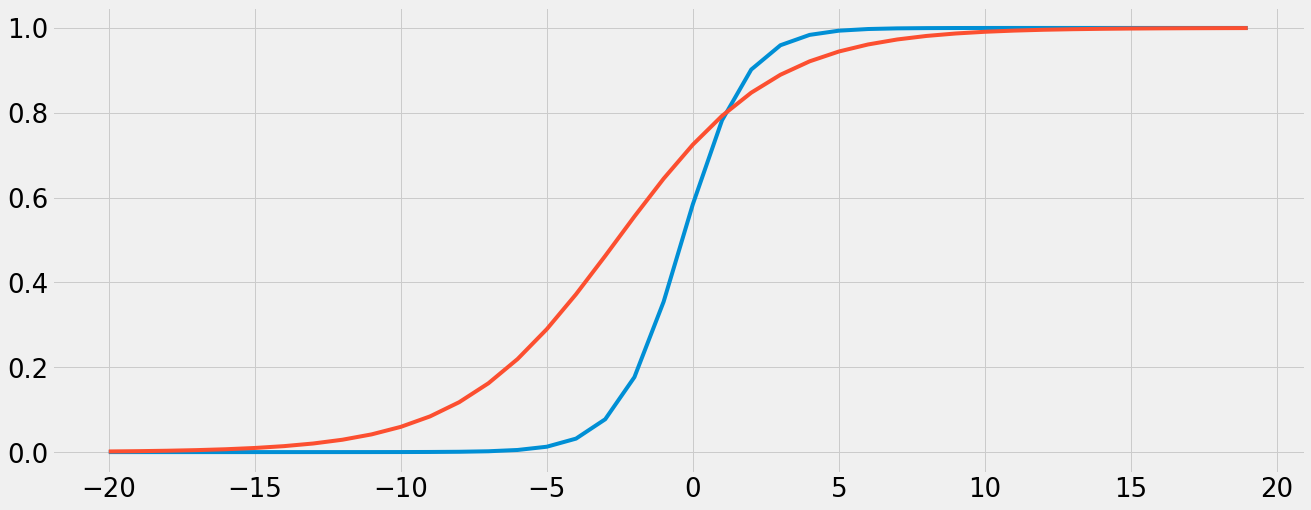

In [84]:
plt.figure(figsize=(20,8))
plt.plot(x,vals)
plt.plot(x, vals1)

In [ ]:
from math import simgoid
sigmoid( np.dot([1, 1], log_regressor.coef_) + log_regressor.intercept_ ) 



In [45]:
from scipy.special import expit

x = 0.25
sig = expit()

In [46]:
sig

In [ ]:
expit()

In [87]:
p(0, coefs, inter)